In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame(np.random.random_sample((100,2)),columns= ['Feature_1','Feature_2'])
df.head()

,Feature_1,Feature_2
0,0.395959,0.676028
1,0.254569,0.582140
2,0.165474,0.222426
3,0.796004,0.564480
4,0.131557,0.723595


In [3]:
mms = StandardScaler()
mms.fit(df)
normalized_data = mms.transform(df)

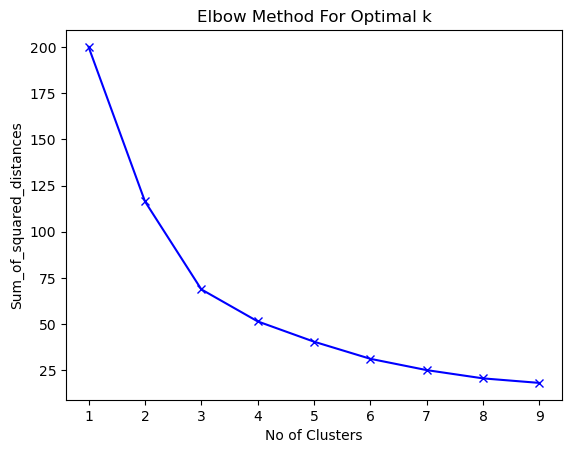

In [4]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
km = KMeans(n_clusters=4)
km = km.fit(normalized_data)

In [6]:
df['labels'] = km.labels_
df.head()

,Feature_1,Feature_2,labels
0,0.395959,0.676028,1
1,0.254569,0.582140,1
2,0.165474,0.222426,2
3,0.796004,0.564480,3
4,0.131557,0.723595,1


## Visualizing the clusters with Box plot
As we have 2 features as random numbers the possible correct combustion of clusters are<br/>

- high value of feature 1 and high value of feature 2<br/>
- high value of feature 1 and low value of feature 2<br/>
- low value of feature 1 and high value of feature 2<br/>
- low value of feature 1 and low value of feature 2<br/>

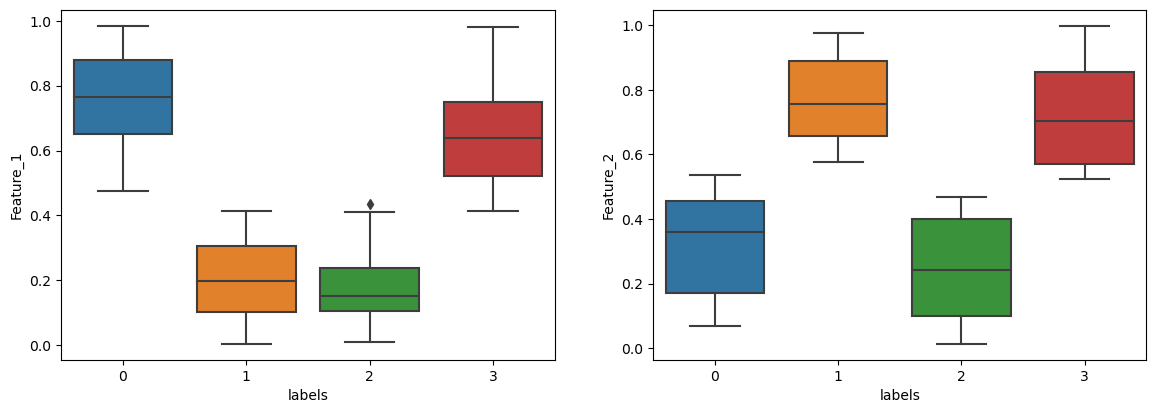

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x="labels", y="Feature_1", data=df)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x="labels", y="Feature_2", data=df)

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

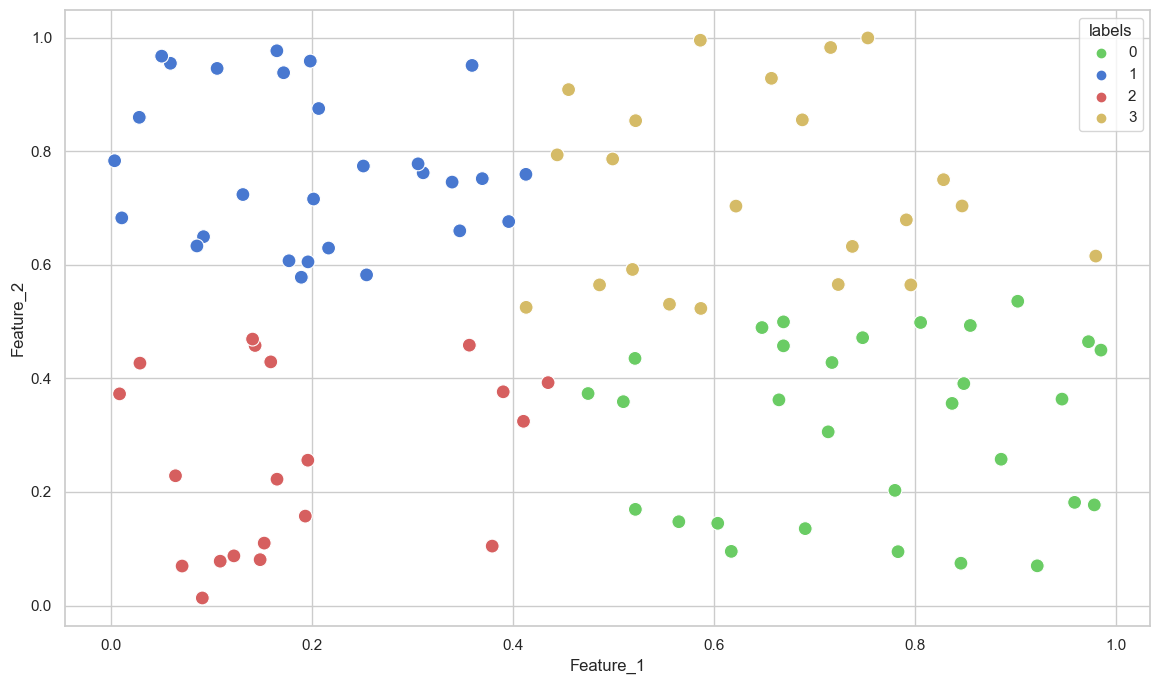

In [8]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid", palette="muted")
sns.scatterplot(x="Feature_1", y="Feature_2", hue="labels",s=100,
                     data=df,palette={0: 'g', 1 : 'b', 2 : 'r',3 : 'y'})